In [1]:
import numpy as np
from misfit_covid import misfit_covid
import matplotlib.pyplot as plt
from model_covid import model_1, model_2, model_3, noise_var

In [2]:
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 4, "text.usetex" : True})

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# 1. Import and Partition the data

In [3]:
jp_data = np.genfromtxt('Japan.csv', delimiter=',')

In [4]:
c_0 = jp_data[0,1]
t1 = 1
t2 = 61
t3 = 84
t4 = 100
obs_data = jp_data[:,1]
obs_data_c = jp_data[t1:t2,1]
obs_data_v = jp_data[t2:t3,1]

Text(0,0.5,'\\# of infected')

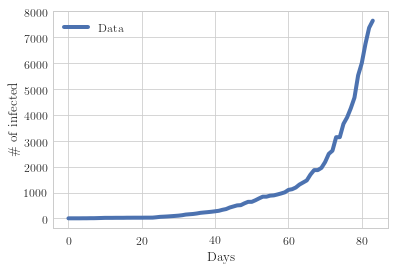

In [5]:
plt.plot(np.arange(obs_data.size), obs_data, label = "Data")
plt.legend()
plt.xlabel("Days")
plt.ylabel("\# of infected")
#plt.savefig("japan_data.pdf", bbox_inches='tight')

# 2. The Calibration Step

Text(0.5,0,'Days')

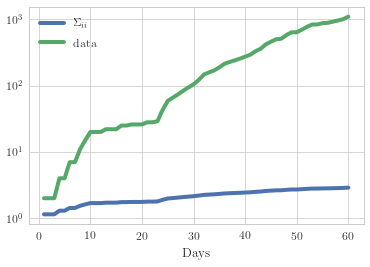

In [6]:
noise_var_c = noise_var(obs_data_c)
plt.semilogy(np.arange(obs_data_c.size)+t1, noise_var_c, label = r"$\Sigma_{ii}$")
plt.semilogy(np.arange(obs_data_c.size)+t1, obs_data_c, label = r"data")
plt.legend()
plt.xlabel(r"Days")
#plt.savefig("japan_calibration_noise.pdf", bbox_inches='tight')

In [7]:
model_choice = 1
misfit = misfit_covid(model_choice, c_0, t1, obs_data_c, noise_var_c)

In [8]:
from prior import uniform_prior
prior_c = uniform_prior(2, [1,1])

In [10]:
from mh import mh
iter = 100000
accepted_c, rejected_c = mh(prior_c, misfit, iter, np.array([0.04, 0.04]))
print("number of accepted samples: ", accepted_c.shape[0])

initial sample:  [0.24921241 0.12576303]
number of accepted samples:  41410


In [14]:
import pandas as pd
import math
n_ts_c = math.floor(accepted_c.shape[0]/2)
print("The number of samples in the latter half of chain is: ", n_ts_c)
df_c = pd.DataFrame(accepted_c[n_ts_c:,:], columns=["r", "p"])

The number of samples in the latter half of chain is:  20705


/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

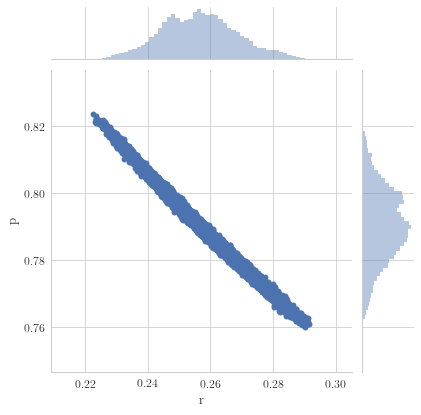

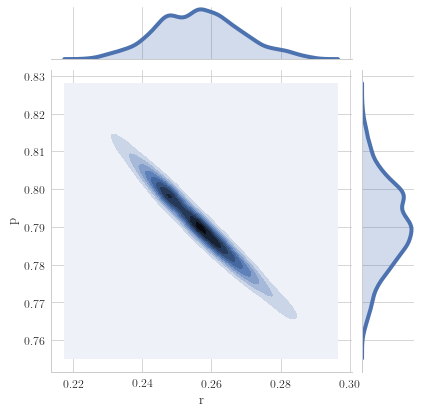

In [15]:
plt.figure(1)
sns.jointplot(x="r", y="p", data=df_c,stat_func=None)
#plt.savefig("japan_calibration.pdf",bbox_inches='tight')
plt.figure(2)
sns.jointplot(x="r", y="p", data=df_c, kind="kde",stat_func=None);
#plt.savefig("japan_calibration_kde.pdf",bbox_inches='tight')

In [16]:
from scipy import stats
kernel = stats.gaussian_kde(np.transpose(accepted_c[n_ts_c:,:]))

In [17]:
post_c_mean = np.array([np.mean(accepted_c[n_ts_c:,0]), np.mean(accepted_c[n_ts_c:,1])])
print("The mean of the posterior density is ", post_c_mean)

The mean of the posterior density is  [0.25648633 0.79039099]


Text(0,0.5,'\\# of infected')

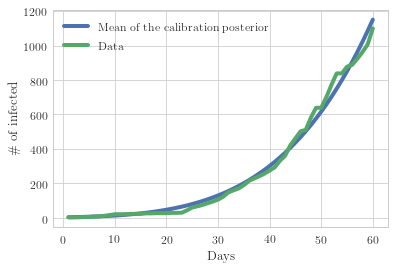

In [18]:
c_c = model_1(post_c_mean, c_0,t1,obs_data_c.size)
plt.plot(np.arange(c_c.size)+t1, c_c, label = "Mean of the calibration posterior")
plt.plot(np.arange(c_c.size)+t1, obs_data_c, label = "Data")
plt.legend()
plt.xlabel("Days")
plt.ylabel("\# of infected")
#plt.savefig("japan_calibration_mean.pdf", bbox_inches='tight')

# 3. The Validation Step

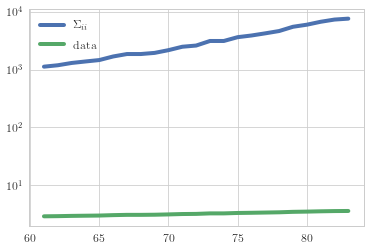

In [19]:
noise_var_v = noise_var(obs_data_v)
plt.semilogy(np.arange(obs_data_v.size)+t2, obs_data_v, label=r"$\Sigma_{ii}$")
plt.semilogy(np.arange(obs_data_v.size)+t2, noise_var_v, label = r"data")
plt.legend()
#plt.savefig("japan_validation_noise.pdf", bbox_inches='tight')

In [20]:
misfit.t0 = t2
misfit.obs_data = obs_data_v
misfit.noise_variance = noise_var_v

In [21]:
from prior import kde_prior
prior_v = kde_prior(2,kernel)

In [23]:
iter = 100000
accepted_v, rejected_v = mh(prior_v, misfit, iter, np.array([0.04, 0.04]))
print("number of accepted samples: ", accepted_v.shape[0])

initial sample:  [0.26038098 0.78728031]
number of accepted samples:  11988


/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

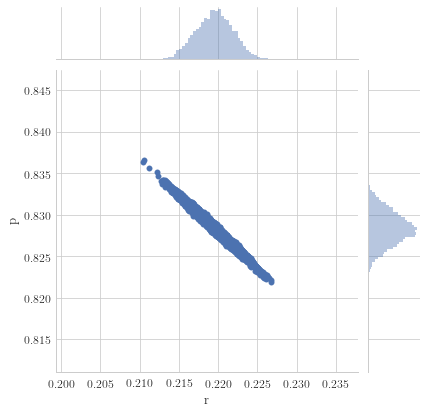

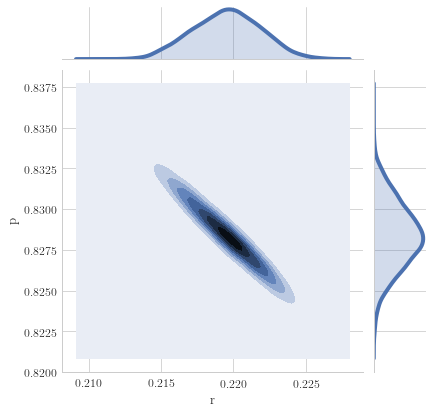

In [24]:
n_ts_v = math.floor(accepted_v.shape[0]/2)
df_v = pd.DataFrame(accepted_v[n_ts_v:,:], columns=["r", "p"])
plt.figure(1)
sns.jointplot(x="r", y="p", data=df_v,stat_func=None)
#plt.savefig("japan_validation.pdf",bbox_inches='tight')
plt.figure(2)
sns.jointplot(x="r", y="p", data=df_v, kind="kde",stat_func=None);
#plt.savefig("japan_validation_kde.pdf",bbox_inches='tight')

/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


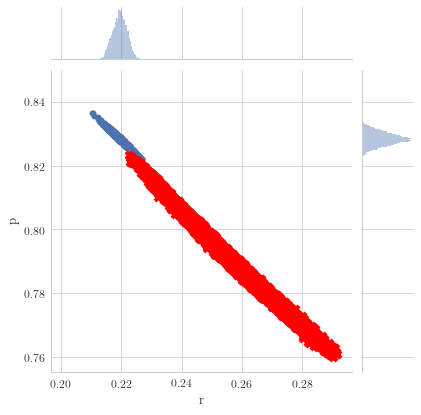

In [25]:
graph_v = sns.jointplot(x="r", y="p", data=df_v, stat_func = None, label = "Validation")
graph_v.x = df_c.r
graph_v.y = df_c.p
graph_v.plot_joint(plt.scatter, marker='x', c='r', s=50)
#plt.savefig("japan_cali_vs_vali.pdf",bbox_inches='tight')

The mean of the validation posterior is,  [0.21953811 0.82837089]


Text(0,0.5,'\\# of infected')

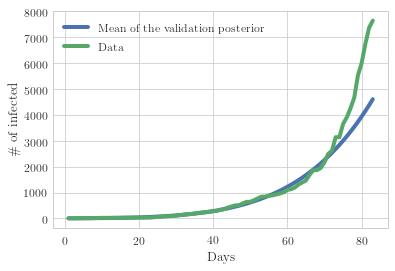

In [26]:
post_v_mean = np.array([np.mean(accepted_v[n_ts_v:,0]), np.mean(accepted_v[n_ts_v:,1])])
print("The mean of the validation posterior is, ", post_v_mean)
c_v = model_1(post_v_mean, c_0,t1,t3-t1)
plt.plot(np.arange(c_v.size)+t1, c_v, label = "Mean of the validation posterior")
plt.plot(np.arange(c_v.size)+t1, obs_data[t1:], label = "Data")
plt.legend()
plt.xlabel("Days")
plt.ylabel("\# of infected")
#plt.savefig("japan_validation_mean.pdf", bbox_inches='tight')

The expectation value of the qoi is:  4849.824658570596
The variance of the qoi is:  867.0530334439317


/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'\\# of infected cases')

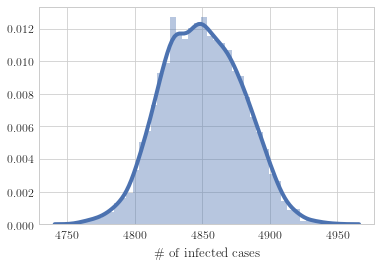

In [42]:
qoi_v = np.zeros(n_ts_v)
for i in range(accepted_v[n_ts_v:,:].shape[0]):
    qoi_v[i] = model_1(accepted_v[n_ts_v+i,:], c_0, t3, 1)[0]
print("The expectation value of the qoi is: ", np.mean(qoi_v))
print("The variance of the qoi is: ", np.var(qoi_v))
sns.distplot(qoi_v)
plt.xlabel("\# of infected cases")
#plt.savefig("japan_validation_qoi.pdf")

In [32]:
print("The error in quantity of interest is: ", abs(np.mean(qoi_v)-jp_data[-1,1])/jp_data[-1,1])

The error in quantity of interest is:  0.3657271837394002


# 4. The Prediction Step

In [39]:
qoi_p = np.zeros(n_ts_v)
for i in range(accepted_v[n_ts_v:,:].shape[0]):
    qoi_p[i] = model_1(accepted_v[n_ts_v+i,:], c_0, t4, 1)[0]

The expectation value of the qoi is,  10432.116271013849
The variance of the qoi is,  9266.186213518646


/Users/Leon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'\\# of infected cases')

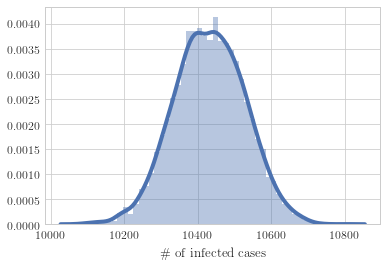

In [40]:
print("The expectation value of the qoi is, ", np.mean(qoi_p))
print("The variance of the qoi is, ", np.var(qoi_p))
sns.distplot(qoi_p)
plt.xlabel("\# of infected cases")
#plt.savefig("japan_prediction_qoi.pdf")